## Fast MC plotting ##

In [54]:
import json
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



Load the .json file with the Monte Carlo result

In [33]:
df_vrt = pd.read_json('../mcdata/mc_reduce_variance.json').dropna()
#df_vrt_noform = pd.read_json('../mcdata/mc_reduce_variance_noform.json').dropna()
df_std = pd.read_json('../mcdata/mc_plain.json').dropna()

Plot the energy distribution for both the standard and for the accelerated MC. For the standard MOnte Carlo the same fiducial cuts need to be applied as implemented in the accelerated version.

In [34]:
r2 = df_std['x']**2+df_std['y']**2
df_std_cut = df_std[(df_std['de']<250) & (r2<1600) & (np.abs(df_std['z'])<40) & (df_std['n']==1)]

In [35]:
print(df_std_cut['w'])

Series([], Name: w, dtype: float64)


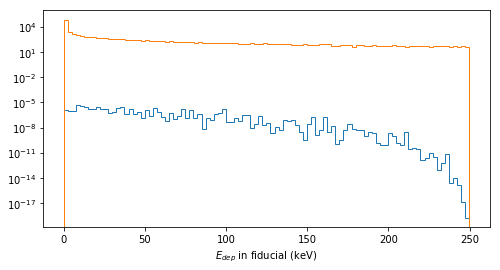

In [36]:
nb = 100
plt.figure(figsize=(8,4))
x_vrt=plt.hist(df_vrt['de'],weights=df_vrt['w'],bins=nb, histtype='step')
x_std=plt.hist(df_std['de'],bins=nb, histtype='step')
#x_std=plt.hist(df_std_cut['de'],weights=df_std_cut['w'],bins=nb, histtype='step')
#plt.xlim([0,10])
#plt.ylim([0,0.02])
plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.yscale('log')


In [6]:
print('standard MC total number of events',int(np.sum(df_std_cut['w'])), ' variance = ',x_std[0].std())
print('variance reduced total weight = ',np.sum(df_vrt['w']),' variance = ',x_vrt[0].std())
print('variance ratio = ',x_std[0].std()/x_vrt[0].std())

standard MC total number of events 78  variance =  0.8553361912137238
variance reduced total weight =  83.29374048871416  variance =  0.04394055876898623
variance ratio =  19.465755902435866


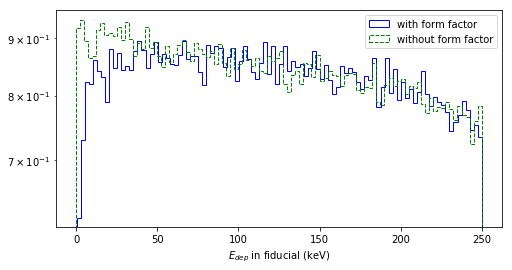

In [7]:
nb = 100
plt.figure(figsize=(8,4))
plt.hist(df_vrt['de'],weights=df_vrt['w'],bins=nb, histtype='step', color='blue')
plt.hist(df_vrt_noform['de'],weights=df_vrt_noform['w'],bins=nb, histtype='step', color='green', linestyle='dashed')

plt.xlabel('$E_{dep}$ in fiducial (keV)')
plt.yscale('log')
plt.legend(('with form factor','without form factor'))

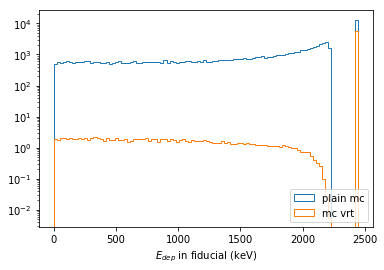

In [60]:
files=['../mcdata/mc_plain.csv','../mcdata/mc_reduce_variance.csv']
for i in files:
    with open(i) as csvfile:
            readCSV = csv.reader(csvfile, delimiter=',')
            w = []
            de = []
            if i =='../mcdata/mc_reduce_variance.csv':
                name='mc vrt'
            else:
                name='plain mc'

            for row in readCSV:
                weight = row[2]
                try: 
                    x= row[7]
                    y= row[8]
                    z= row[9]
                    energy = row[10]
                except:
                    continue 
                    #nog iets verzinnen om alle scatters automatisch af te gaan maar 
                    #       voor nu prima omdat je toch 1 scatters wilt hebben
                    #
                
                r2 = float(x)**2+float(y)**2    
                if (float(energy)<2600) & (r2<1600) & (np.abs(float(z)<40)):
                    w.append(weight)
                    de.append(energy)
                
    de = np.float64(de)
    w= np.float64(w) 

    b = plt.hist(de,weights=w,bins=nb, histtype='step',label = name)
    plt.legend(loc='lower right')
    plt.yscale('log')
    plt.xlabel('$E_{dep}$ in fiducial (keV)')
        